## Results: Fine-tuning training parameters

In [1]:
import sys
sys.path.append("C:/Users/matth/Documents/Martinos Center/mrtoct") 

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
import utils.test_utils as utils
import os
import pickle
import numpy as np
import gc
import pandas as pd

In [2]:
path_model = "C:/Users/matth/Documents/Martinos Center/Models/DeepBrain/"
path_dataset = "C:/Users/matth/Documents/Martinos Center/mrtoct/datasets/"

## 3.1.1 Training set size

### Python commands

Run these lines in the command prompt to generate the dataset and train models.

##### Preprocessing:




<font color = blue>python preprocessing.py --dataset all_mask_sqrt</font>

##### Training: 


    
* <font color = blue>python train.py --dataset all_mask_sqrt --name nsub1 --n_subjects 1</font>
* <font color = blue>python train.py --dataset all_mask_sqrt --name nsub3 --n_subjects 3</font>
* <font color = blue>python train.py --dataset all_mask_sqrt --name nsub6 --n_subjects 6</font>
* <font color = blue>python train.py --dataset all_mask_sqrt --name nsub9 --n_subjects 9</font>

##### Retrieve data

In [3]:
model_names = ["nsub1", "nsub3", "nsub6", "nsub9", "default"]
models, outputs = utils.retrieve_models(model_names, path_model)
trains, vals, bevels, begens, begts = utils.retrieve_history(outputs)

In [4]:
steps_per_epo = [23,70,141,212,307]
n_epo = [180, 60, 30, 20, 15]
total_samples = [20*steps_per_epo[i]*n_epo[i] for i in range(len(steps_per_epo))]
nb_intervals = [10 * n_epo[i] for i in range(len(n_epo))]
nb_points = [10 * n_epo[i] + 1 for i in range(len(n_epo))]
sample_plot_freq = [int(total_samples[i] / nb_intervals[i]) for i in range(len(n_epo))]

##### Plot

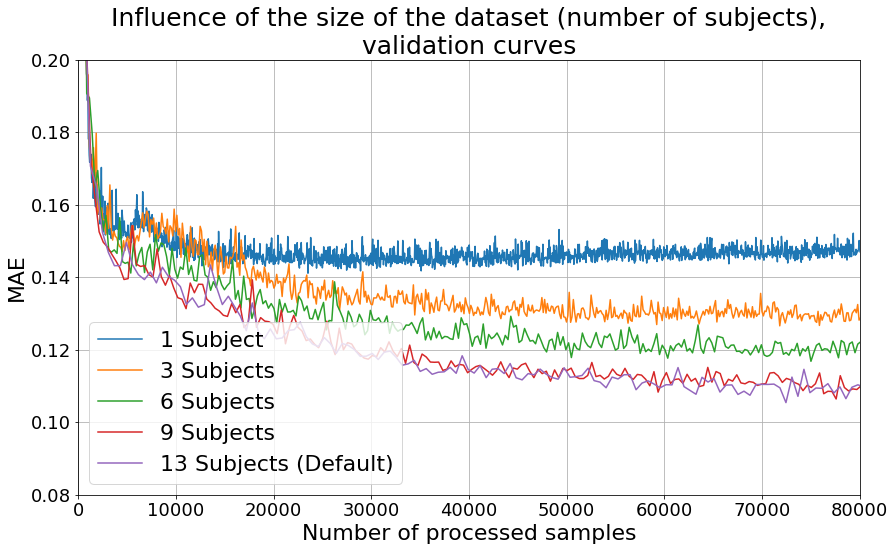

In [5]:
labels = ["1 Subject", "3 Subjects", "6 Subjects", "9 Subjects", "13 Subjects (Default)"]
title = "Influence of the size of the dataset (number of subjects),\nvalidation curves"

fig, ax = plt.subplots(figsize = (14,8))
    
for i in range(len(vals)):
    x = np.linspace(0, total_samples[i], nb_points[i])
    ax.plot(x, vals[i], label = "{}".format(labels[i]))
    
ax.set_title(title, fontsize = 25)
ax.set_xlabel("Number of processed samples", fontsize = 22)
ax.set_ylabel("MAE", fontsize = 22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylim([0.08, 0.200])
ax.set_xlim([0, 80000]) 
ax.legend(fontsize = 22, loc = 'lower left')
ax.grid('on')


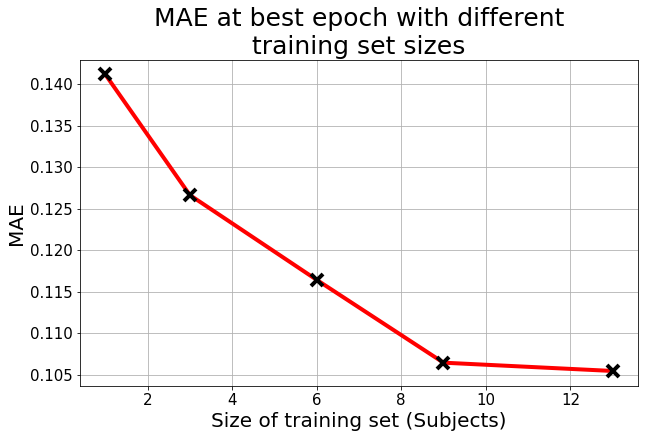

In [6]:
best_mae = []

for i in range(len(n_epo)):
    model_info = pickle.load(open(path_model + model_names[i] + '/' + model_names[i] + "_info", 'rb'))
    best_mae.append(model_info["best_epoch_mae"])

x = [1, 3, 6, 9, 13]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, best_mae, 'r', linewidth = 4)
ax.plot(x, best_mae, 'kx', markersize = 12, mew = 4)
ax.set_title("MAE at best epoch with different\ntraining set sizes", fontsize = 25)
ax.set_ylabel("MAE", fontsize = 20)
ax.set_xlabel("Size of training set (Subjects)", fontsize= 20)
ax.tick_params(labelsize=15)
ax.grid('on')

##### Metrics

In [7]:
dataset = np.load(path_dataset + "all_mask_sqrt" + "/valid_eval.npz")
metrics = utils.compute_val_metrics(models, model_names, dataset, bevels, begens, begts)
metrics

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:18<00:00, 39.62s/it]


,MAE,MSE,NRMSE,PSNR,SSIM
,,,,,
nsub1,0.141,0.058,0.241,28.486,0.943
nsub3,0.127,0.051,0.226,29.708,0.982
nsub6,0.116,0.046,0.215,30.719,0.973
nsub9,0.106,0.040,0.200,32.155,0.970
default,0.105,0.040,0.200,32.182,0.967


## 3.1.2 Square Root of Porosity

### Python commands

Run these lines in the command prompt to generate the dataset and train models.

##### Preprocessing:

* <font color = blue>python preprocessing.py --dataset all_mask_sqrt</font>
* <font color = blue>python preprocessing.py --dataset all_mask_nosqrt --no_sqrt </font>

##### Training: 
    
* <font color = blue>python train.py --dataset all_mask_sqrt --name default_45epochs --n_epocbs 45</font>
* <font color = blue>python train.py --dataset all_mask_nosqrt --name no_sqrt_45epochs --n_epochs 45</font>

##### Retrieve data

In [8]:
del models, outputs
gc.collect

<function gc.collect(generation=2)>

In [9]:
model_names = ["default_45epochs", "no_sqrt_45epochs"]
models, outputs = utils.retrieve_models(model_names, path_model)
trains, vals, bevels, begens, begts = utils.retrieve_history(outputs)

##### Plot

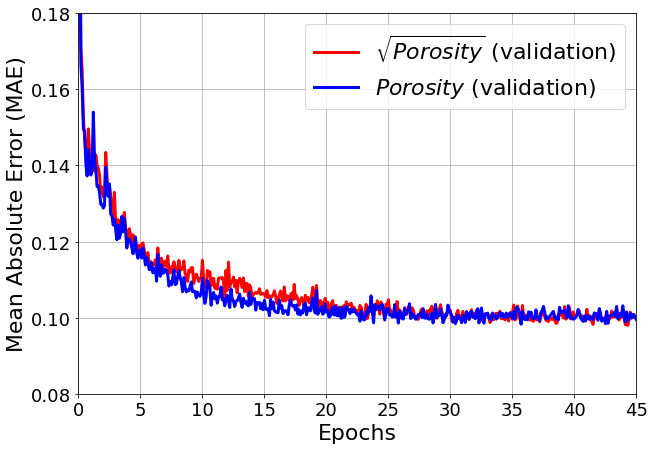

In [10]:
fig, ax = plt.subplots(figsize = (10,7))
x = np.linspace(0, 45, len(trains[0]))

ax.plot(x, vals[0], 'r', label = '$\sqrt{Porosity}$ (validation)', linewidth = 3)
ax.plot(x, vals[1], 'b', label = '$Porosity$ (validation)', linewidth = 3)
ax.set_xlabel("Epochs", fontsize = 22)
ax.set_ylabel("Mean Absolute Error (MAE)", fontsize = 22)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylim([0.08, 0.180])
ax.set_xlim([0, 45])
ax.legend(fontsize = 22, loc = 'upper right')
ax.grid('on')

##### Metrics

In [11]:
dataset_1 = np.load(path_dataset + "all_mask_sqrt" + "/valid_eval.npz")
dataset_2 = np.load(path_dataset + "all_mask_nosqrt" + "/valid_eval.npz")
datasets = [dataset_1, dataset_2]

metrics = utils.compute_val_metrics(models, model_names, datasets, bevels, begens, begts)
metrics

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:21<00:00, 40.89s/it]


,MAE,MSE,NRMSE,PSNR,SSIM
,,,,,
default_45epochs,0.098,0.037,0.191,33.092,0.982
no_sqrt_45epochs,0.098,0.036,0.191,33.152,0.981


## 3.1.3 Data augmentation

Run these lines in the command prompt to generate the dataset and train models.

##### Preprocessing:

<font color = blue>python preprocessing.py --dataset all_mask_sqrt </font>

##### Training: 
    
* <font color = blue>python train.py --dataset all_mask_sqrt --name to --to</font>
* <font color = blue>python train.py --dataset all_mask_sqrt --name to_noflip --to --no_flip</font>

##### Retrieve data

In [12]:
del models, outputs
gc.collect

<function gc.collect(generation=2)>

In [13]:
model_names = ["default", "to", "to_noflip"]
models, outputs = utils.retrieve_models(model_names, path_model)
trains, vals, bevels, begens, begts = utils.retrieve_history(outputs)

##### Plot

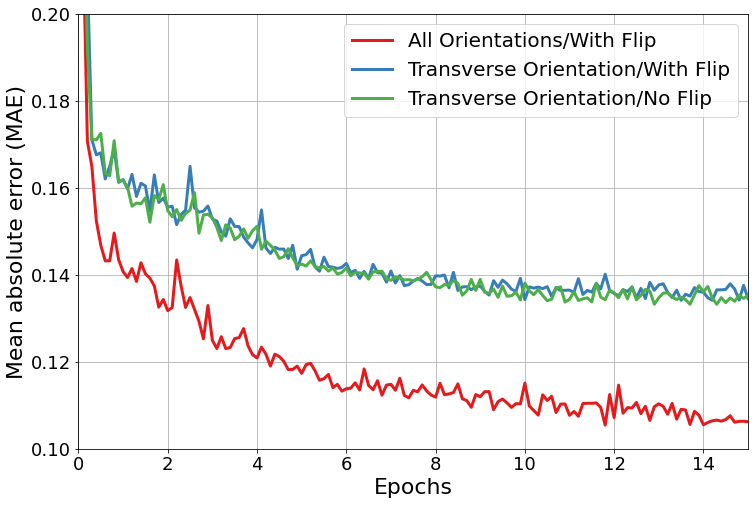

In [14]:
labels = ["All Orientations/With Flip","Transverse Orientation/With Flip", "Transverse Orientation/No Flip"]

fig, ax = plt.subplots(figsize = (12,8))
    
for i in range(len(vals)):
    x = np.linspace(0, 15, len(trains[i]))
    ax.plot(x, vals[i], label = "{}".format(labels[i]), linewidth = 3)

ax.set_xlabel("Epochs", fontsize = 22)
ax.set_ylabel("Mean absolute error (MAE)", fontsize = 22)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylim([0.1, 0.200])
ax.set_xlim([0, 15])
      
ax.grid("on")
    
colormap = cm.get_cmap("Set1") # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
ax = plt.gca()
lines = ax.lines
N = len(lines)
    
for n in range(0, N):
    random_color = colormap(n)
    lines[n].set_color(random_color)

ax.legend(fontsize = 20, loc = 'upper right')

##### Metrics

In [16]:
dataset_1 = np.load(path_dataset + "all_mask_sqrt" + "/valid_eval.npz")
metrics = utils.compute_val_metrics(models, model_names, dataset_1, bevels, begens, begts)
metrics

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:05<00:00, 41.87s/it]


,MAE,MSE,NRMSE,PSNR,SSIM
,,,,,
default,0.105,0.040,0.200,32.182,0.967
to,0.134,0.055,0.235,28.936,0.954
to_noflip,0.133,0.056,0.236,28.847,0.955
